In [1]:
from src.models.high_level_model import HighLevelModel
from src.data.multi_output_dataset import MultiOutputDataModule

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [2]:
TYPE_LABELS = [
    "sedan",
    "suv",
    "van",
    "hatchback",
    "mpv",
    "pickup",
    "bus",
    "truck",
    "estate",
    "sportscar",
    "RV",
]

COLOR_LABELS = [
    "yellow",
    "orange",
    "green",
    "gray",
    "red",
    "blue",
    "white",
    "golden",
    "brown",
    "black",
    "purple",
    "pink",
]

SGVEHICLE_CLASSES = [len(COLOR_LABELS), len(TYPE_LABELS)]

In [3]:
model = HighLevelModel.load_from_checkpoint(
    "models/sgvehicle-high-level-model.ckpt",
    task_num_classes=SGVEHICLE_CLASSES,
    map_location="cpu",
)
model = model.eval()

data = MultiOutputDataModule(
    root_dir="data/SGVehicle", batch_size=64, num_workers=0, task_num_classes=SGVEHICLE_CLASSES
)
data.setup()

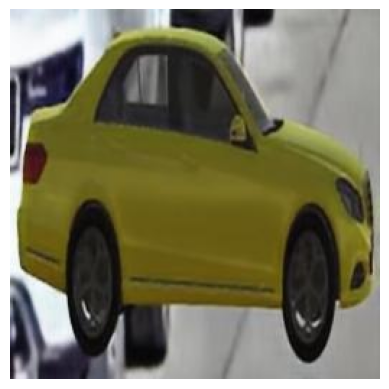

Predicted color: yellow - Ground Truth color: yellow
Predicted type: sedan - Ground Truth type: sedan



In [4]:
for batch in data.val_dataloader():
    # Get the inputs
    x, y = batch[0], batch[1]

    # Forward pass
    with torch.no_grad():
        y_pred = model(x)

    # Plot the image
    plt.imshow(x[0].permute(1, 2, 0))
    plt.axis("off")
    plt.show()

    # Print the predicted and ground truth labels
    print(
        f"Predicted color: {COLOR_LABELS[torch.argmax(y_pred[0][0]).item()]} - Ground Truth color: {COLOR_LABELS[y[0][0].item()]}"
    )
    print(
        f"Predicted type: {TYPE_LABELS[torch.argmax(y_pred[1][0]).item()]} - Ground Truth type: {TYPE_LABELS[y[0][0].item()]}"
    )
    print()
    break

In [5]:
trainer = pl.Trainer(accelerator="gpu")
trainer.test(model, data)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/marcs/projects/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which w

Testing DataLoader 0: 100%|██████████| 76/76 [00:17<00:00,  4.46it/s]Task 0 Accuracy: 0.81
Task 0 F1 Score: 0.81
Task 0 Confusion Matrix:
[[345   0   5   0   0   1   0  69   0   0   0   0]
 [ 14 292   0   0   1   0   0  77   6   0   0   1]
 [  1   0 359  22   1  17   1   0   8   9   1   1]
 [  0   0  51 208   0  17  38   1  34  55   0   1]
 [  0   0   1   0 427   0   0   0   0   0   0   2]
 [  0   0  19  19   0 330  11   0   2   7   0   0]
 [  0   0   6  12   0   6 387   0   4   1   0  16]
 [111  17   0   0   0   0   0 251  10   0   0   1]
 [  0   1   2   8   4   0   3   9 305  17   0  10]
 [  0   0  16  56   2  13   3   0  40 294   1   0]
 [  0   0   1   0   0   0   0   0   0   0 373   2]
 [  1   1   2   1   7   0  15   0   2   0   1 346]]
Task 1 Accuracy: 0.82
Task 1 F1 Score: 0.82
Task 1 Confusion Matrix:
[[847  12   1  99   1   2   0   4   3 107   0]
 [ 31 430   3  46   0   7   0   2   1   9   0]
 [  1   2 221   3   0   1   1   5   0   1   2]
 [ 83  25   2 834   0   4   0   1   9  

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric         ┃        DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ test_accuracy (High-level) │     0.8184746503829956     │
│ test_accuracy (Low-level)  │     0.6677057147026062     │
│    test_task_0_accuracy    │     0.8140066266059875     │
│    test_task_0_conf_acc    │     0.8140066266059875     │
│       test_task_0_f1       │     0.8120482563972473     │
│    test_task_1_accuracy    │     0.8229426145553589     │
│    test_task_1_conf_acc    │     0.8229426145553589     │
│       test_task_1_f1       │     0.8223041296005249     │
└────────────────────────────┴────────────────────────────┘

[{'test_task_0_accuracy': 0.8140066266059875,
  'test_task_0_f1': 0.8120482563972473,
  'test_task_0_conf_acc': 0.8140066266059875,
  'test_task_1_accuracy': 0.8229426145553589,
  'test_task_1_f1': 0.8223041296005249,
  'test_task_1_conf_acc': 0.8229426145553589,
  'test_accuracy (Low-level)': 0.6677057147026062,
  'test_accuracy (High-level)': 0.8184746503829956}]